In [1]:
%matplotlib inline
import sys
sys.path.append('plantcv_directory')
# Modify plantcv_directory to the directory where PlantCV is installed (e.g. /home/jdoe/plantcv/)
from matplotlib import pyplot as plt
import plantcv as pcv
import cv2
import numpy as np
from plantcv.dev.color_palette import color_palette
from math import sqrt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)
# (10,10) in the line above controls displayed image resolution. Bigger images better display squares drawn in several steps below.

In [2]:
# Set variables
device = 0
debug = 'plot'
vis_img = 'split_image_file'
# Modify split_image_file to the directory and file for a split image to be analyzed (e.g. /home/jdoe/timelapse_images/split_image1_p0.jpg)

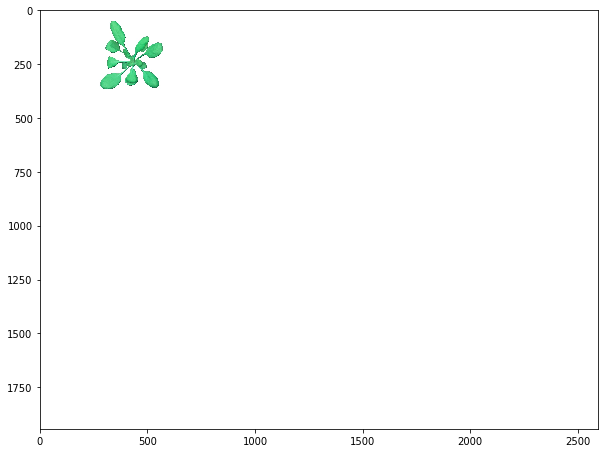

In [3]:
# Read VIS image
img, path, filename = pcv.readimage(vis_img)
plt.imshow(img)
plt.show()

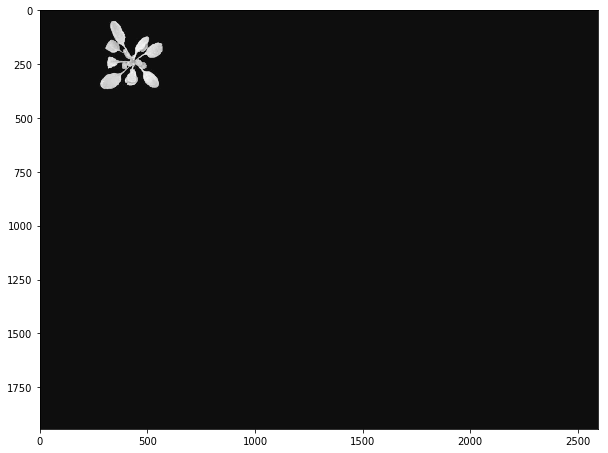

In [4]:
# Convert RBG to Grey using Blue-Yellow Channel 
device, b = pcv.rgb2gray_lab(img1, 'b', device, debug)
# Channel 'b' should make the plant brighter over background. Otherwise, use channel 'l' or 'a'. 

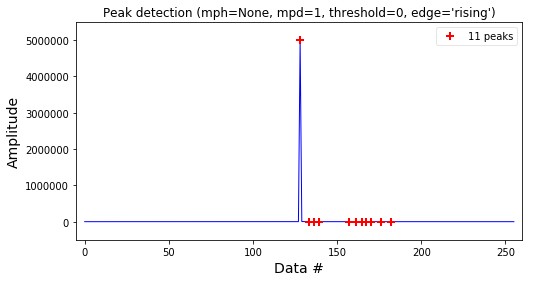

Threshold value = 133


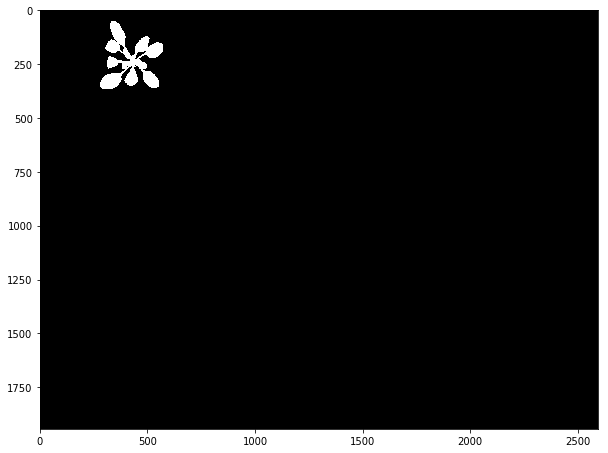

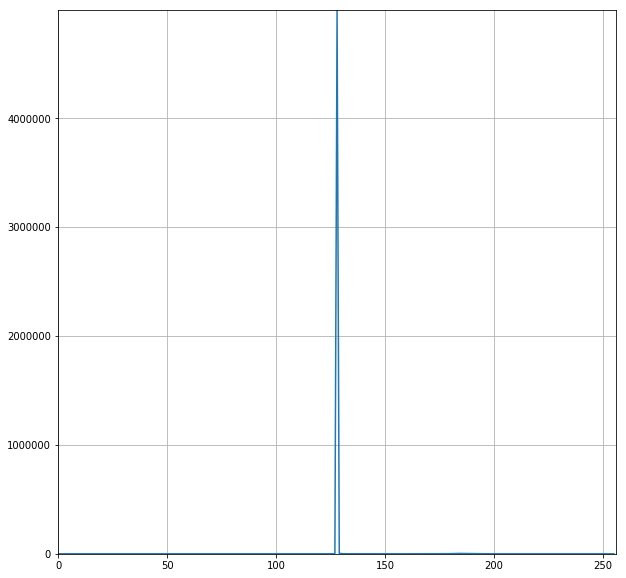

In [7]:
# Triangle Thresholded
device, tri_img = pcv.triangle_auto_threshold(device, b, 255, 'light', 5, debug)
# Thresholds based on a value 5. Modify the number 5 above to threshold plant from background.

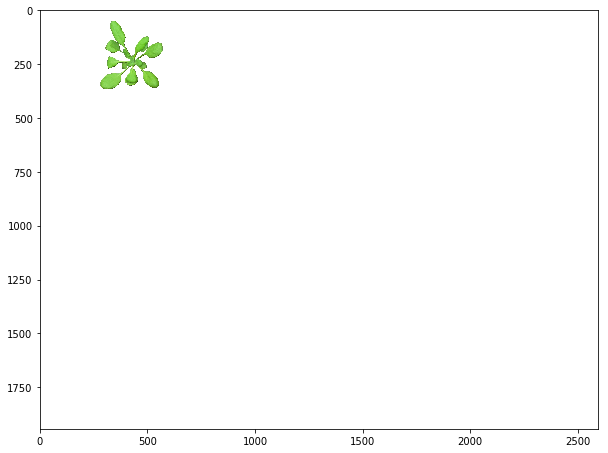

In [10]:
# Mask original image (here, based on blue channel)
device, masked = pcv.apply_mask(img, tri_img, 'white', device, debug)

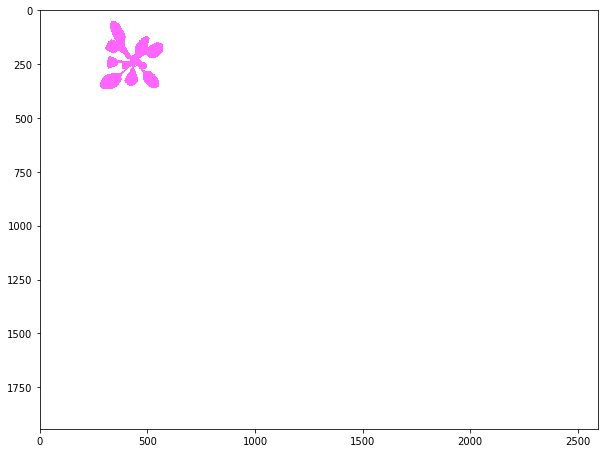

In [11]:
# Identify objects
device, id_objects, obj_hierarchy = pcv.find_objects(masked, tri_img, device, debug)

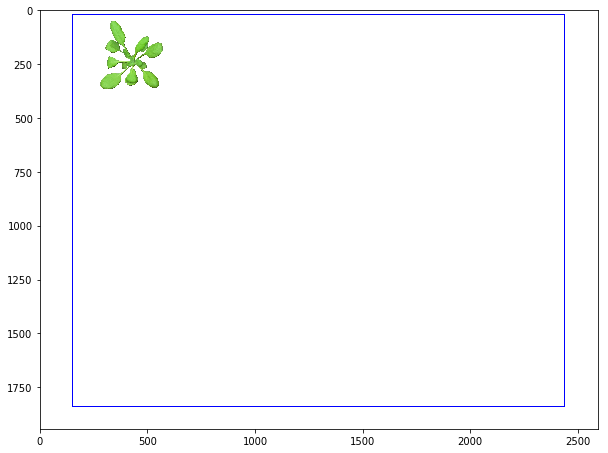

In [12]:
# Define region of interest
device, roi1, roi_hierarchy = pcv.define_roi(masked, 'rectangle', device, None, 'default', debug, True, 
                                             150, 20, -150, -100)
# Modify the 4 coordinates in parenthesis to frame the image area where the plant is.

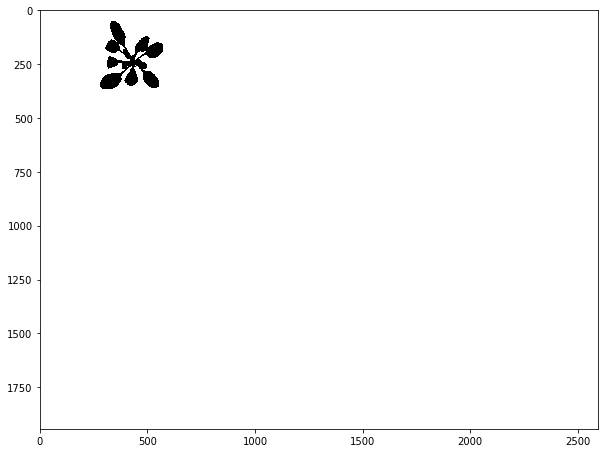

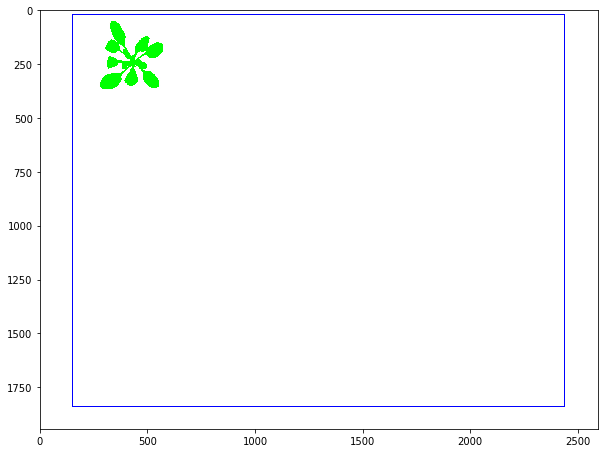

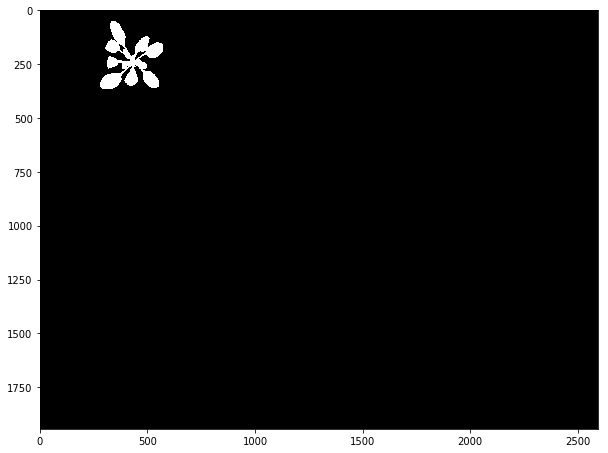

In [14]:
# Decide which objects to keep
device, roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img, 'partial', roi1, roi_hierarchy, id_objects, obj_hierarchy, device, debug)

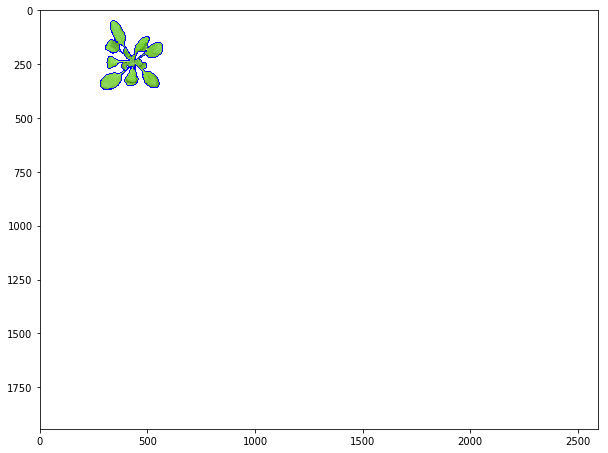

In [15]:
# Object combine kept objects
device, obj, mask = pcv.object_composition(img, roi_objects, hierarchy3, device, debug)

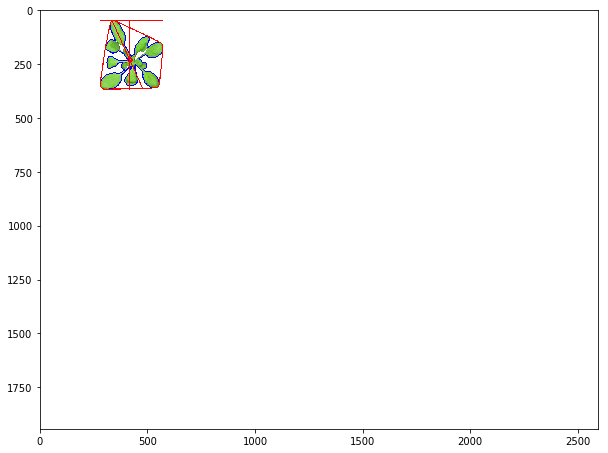

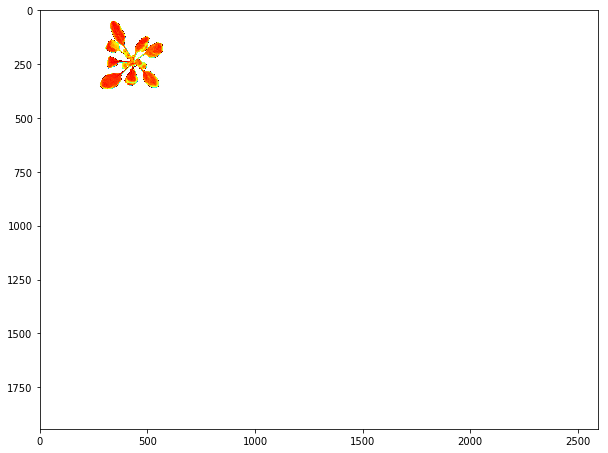

In [16]:
############### Analysis ################  

# Find shape properties, output shape image (optional)
device, shape_header, shape_data, shape_img = pcv.analyze_object(img, img, obj, mask, device, 'plot')

# Determine color properties: Histograms, Color Slices and Pseudocolored Images, output color analyzed images (optional)
device, color_header, color_data, norm_slice = pcv.analyze_color(img, img, kept_mask, 256, device, 'plot', None,'v','img', 300)